# Simulation: The Gambler's Problem in the Dice Game

A player pays 5 dollars to participate in a dice game, competing against an opponent to see who rolls the higher number. Both the player and the opponent each roll a die, and the following prize rules are established:

- **If the player's roll is higher**, they win twice the difference between their roll and the opponent's.
- **If the player's roll is equal to or lower than the opponent's**, they win nothing.

What do you think of this game? Is it worthwhile for the player?

We will simulate 100 games and calculate the probability of making a profit, defined as winning 6 dollars or more in each game.

#### Importing libraries

In [1]:
from random import seed
from random import randint
from matplotlib import pyplot as plt
import numpy as np


In [2]:
seed(1) #Seed for the random number generator

# Bet amount in dollars
bet = 5

# Number of games to simulate
num_games = 100

# Counter for profitable outcomes
profit_count = 0

for _ in range(num_games):
    profit = 0
    player_roll = randint(1, 6)      # Player's dice roll
    opponent_roll = randint(1, 6)    # Opponent's dice roll
    
    if player_roll > opponent_roll:   # If the player's roll is higher
        profit = 2 * (player_roll - opponent_roll)  # Profit from this game
    
    if profit > bet:                  # If there is a profit
        profit_count += 1

# Calculate the probability of making a profit
probability = profit_count / num_games

# Display the results
print('Bet:', bet, 'dollars.')
print('Chance of making a profit:', probability)
print('Theoretical probability:', 1/6)


Bet: 5 dollars.
Chance of making a profit: 0.19
Theoretical probability: 0.16666666666666666


Furthermore, we can analyze how the chance of achieving a profit varies based on the bet size.

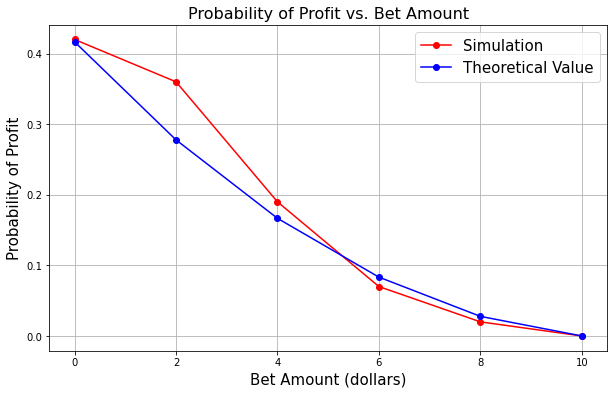

In [3]:
# Set seed for reproducibility
seed(100)

# Initialize plot
plt.figure(figsize=(10, 6))

# Lists to store results
prob_profit = []  # Simulated probability of profit
bet_values = []   # Corresponding bet amounts

# Simulate for varying bet amounts
for bet in np.arange(0, 11, 2):
    num_games = 100  # Number of games to simulate
    profit_count = 0

    # Simulate individual games
    for _ in range(num_games):
        player_roll = randint(1, 6)     # Player's dice roll
        opponent_roll = randint(1, 6)  # Opponent's dice roll
        profit = 2 * (player_roll - opponent_roll) if player_roll > opponent_roll else 0

        if profit > bet:  # Count profitable games
            profit_count += 1

    # Calculate and store the probability of profit
    prob_profit.append(profit_count / num_games)
    bet_values.append(bet)

# Plot simulation results
plt.plot(bet_values, prob_profit, 'ro-', label='Simulation')
plt.xlabel('Bet Amount (dollars)', fontsize=15)
plt.ylabel('Probability of Profit', fontsize=15)

# Add theoretical values
theoretical_prob = [15/36, 10/36, 6/36, 3/36, 1/36, 0]  # Theoretical probabilities
theoretical_bets = [0, 2, 4, 6, 8, 10]                  # Corresponding bet amounts
plt.plot(theoretical_bets, theoretical_prob, 'bo-', label='Theoretical Value')

# Finalize plot
plt.legend(fontsize=15)
plt.grid(True)  # Optional: Add grid for better readability
plt.title('Probability of Profit vs. Bet Amount', fontsize=16)
plt.show()


We notice that the value obtained in the simulation approaches the theoretical value. Additionally, we observe that the probability of profit decreases as the bet amount increases; in other words, the higher the bet amount, the lower the chance of making a profit.